Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


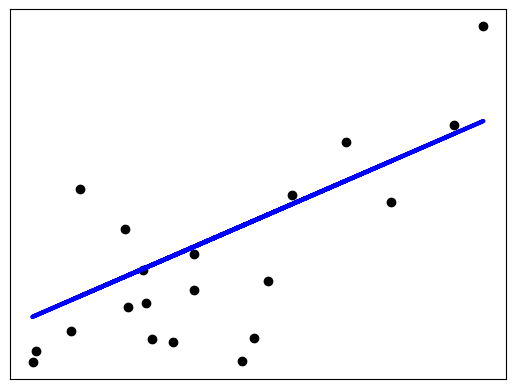

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #r2 score is eqaual to (1-(sum of squares of residuals(SSR)/Total sum of squares(SST)))
                                                         # it is a measure of how well is the model performing
                                                         # Residual for the ith data point(Ri)= Actual(i)-Predicted(i)
                                                         # SSR= Summation of R(i)s
                                                         # SST= Summation of (Obs. Value- Mean of observed values)**2
                                                         #r2_score=1-(SSR/SST)

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)  #datasets.load_diabetes unpacks the values into diabetes_X and diabetes_Y,
                                                                  #return_X_y=True argument indicates that the function should return
                                                                  #both the feature matrix (diabetes_X) and the target variable (diabetes_y)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]                         #the np.newaxis command helps adding another dimension to the array
                                                                  #it effectively converts diabetes_X into a 2D array from a 1D array
                                                                  #[:, np.newaxis, 2]---> The colon indicates we wish to include all the rows
                                                                  #The 2 indicates only the 3rd element(index 2) is selected
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]                               #choose all but last 20
diabetes_X_test = diabetes_X[-20:]                                #choose last 20

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()                            #This line creates an instance of the LinearRegression class and assigns it to the variable regr
                                                                  #The variable regr now represents the linear regression model.

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)                      #the 'fit' intakes the input and target values and the trained model is stored in regr

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)                   #now using the test data(which we separated out initially), we use regr to draw a linear relation between diabetes_y_pred and diabetes_X_test
                                                                  #predict is used to determine values for unseen/new data

# The coefficients
print("Coefficients: \n", regr.coef_)                             #since the trained model is stored in regr, we can output the coefficients and the intercept
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

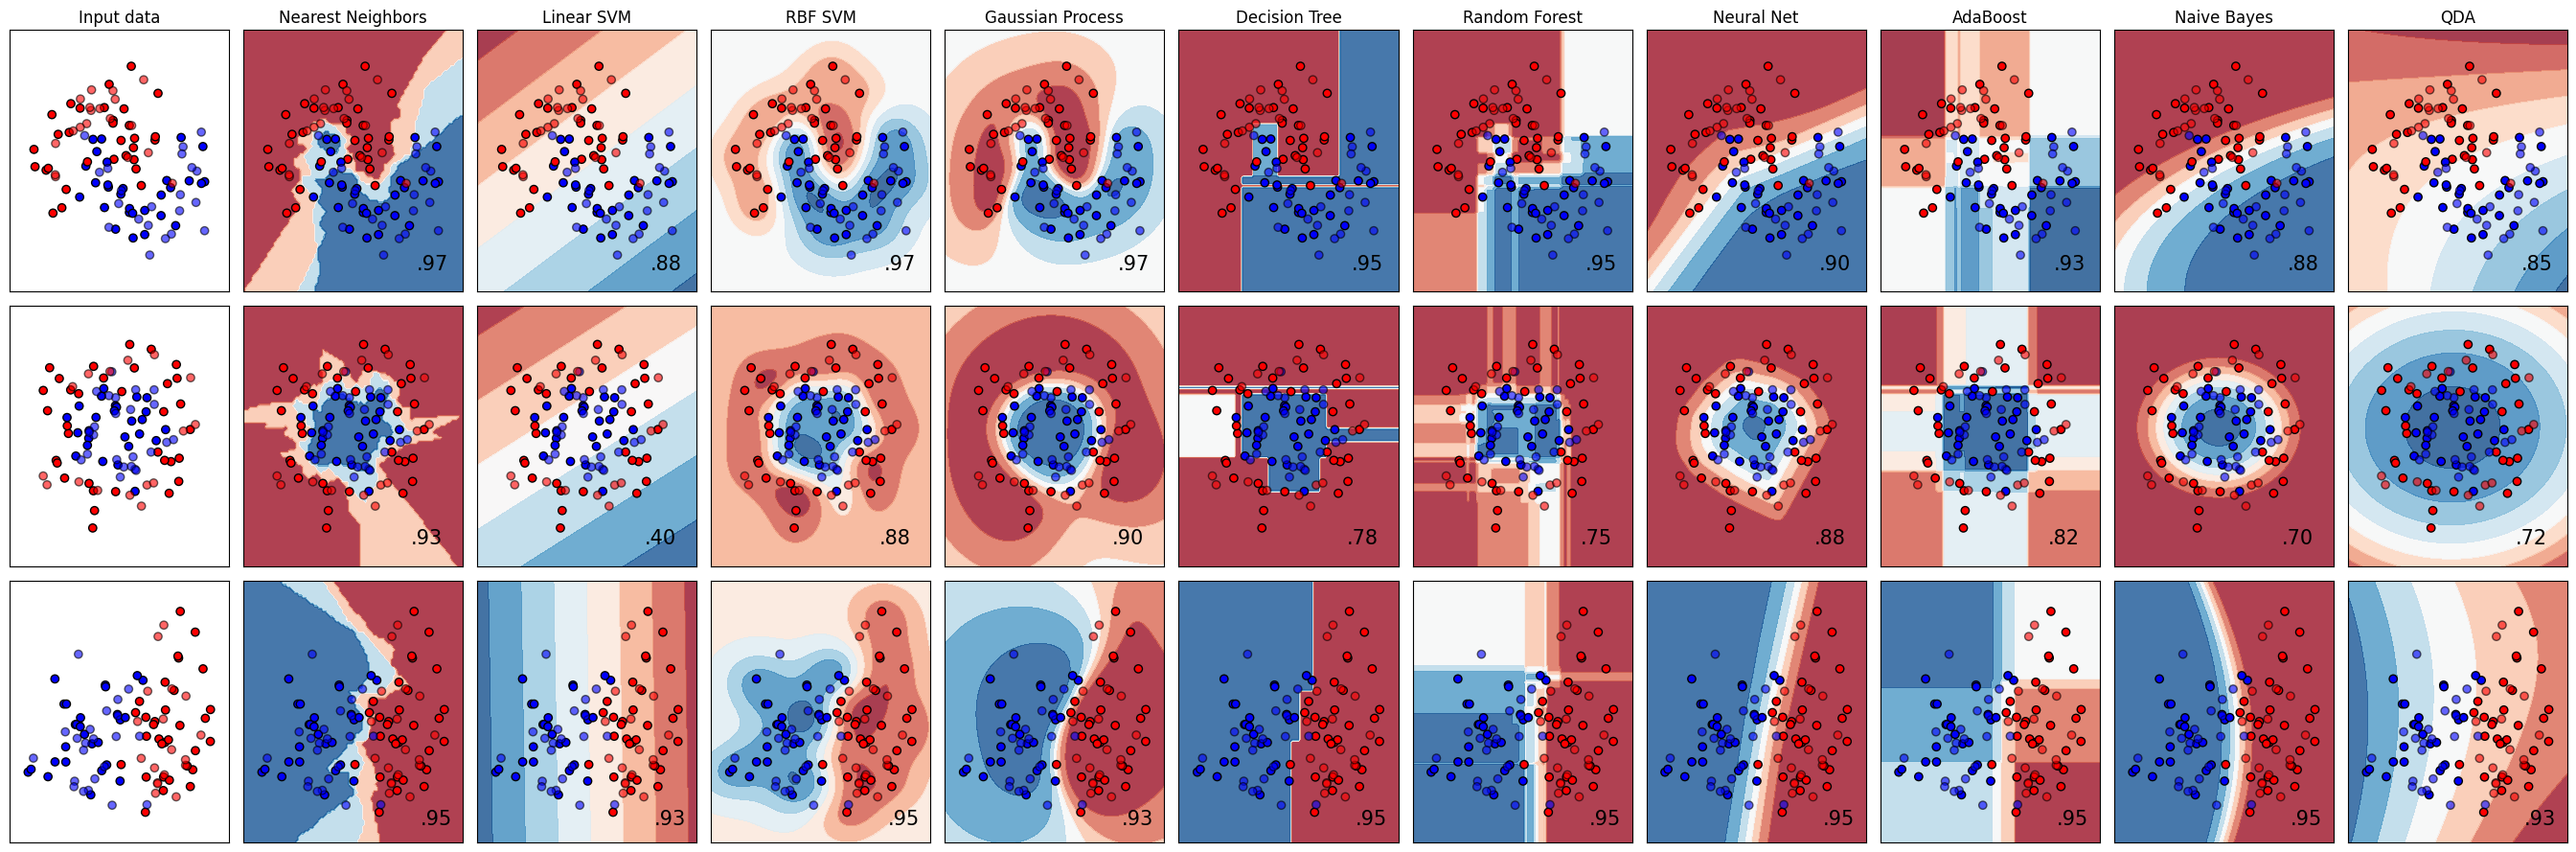

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap                                    #Allows customization of colours in the plots by matplotlib

from sklearn.datasets import make_circles, make_classification, make_moons      #make circles: generates a large circle containing a smaller circle in two-dimensional space.
                                                                                #It is commonly used to create a binary classification dataset with non-linear decision boundaries.

                                                                                #make_classification: generates a random classification dataset with specified characteristics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",                                                        #K nearest neighbours: Takes the distance of the k specified neighbours and sorts them.
                                                                                #From the sorted info, checks the first k and then based on majority assigns the cluster/group

    "Linear SVM",                                                               #Linear SVM: For data which can be linearly seperated by a hyperplane(=w.x+b=0).
                                                                                #The Hyperplane is chosen such that the margin(=2/|w|) is maximum

    "RBF SVM",                                                                  # Radial basis Function: It uses the kernel trick to get a curved decision boundary for non-linear data
                                                                                #It is basically using a function which helps to transform the data points(usually by introducing a new axis) in such a way that a hyper plane is possible

    "Gaussian Process",                                                         #

    "Decision Tree",                                                            # A (Regression) decision tree is outputs values at its leaves.
                                                                                #It has a root(the starting decision pt.) which is derived throught the minimization of its cost function(operating on the basis of threshold value).
                                                                                #We decide a minimum number of points above which the decision tree can introduce a separation of catagories, usually 20.(also determines over/under fitting)
                                                                                #Then the decision tree computes the average of the data set in various catagories and each catagory is further divided till it reaches the specified min.


    "Random Forest",                                                            # It is a a huge set of many decision trees, the outputs are dependent on the majority vote of all trees.
                                                                                #Though the data set is usuallly 2/3rd of the original data since the "Boot-strap data" is chosen randomly and 1/3rd is not taken in
                                                                                #The remainant data is used as a test to determine the accuracy of the forest

    "Neural Net",                                                               # It contains multiple layers of neurons(which hold numeric activation values ranging b/w 1&0)
                                                                                # the activation depends on a weighted sigmoid function of the previous neurons, and the algorithm uses a gradient descent cost curve minimization

    "AdaBoost",                                                                 # It uses a collection of 'Stumps' and unlike Random forest, the stumps have an unequal say in the final result
                                                                                #Amount of say=0.5*log((1-total error)/total error)
                                                                                #Newly created stumps have updated sample weights to account in previous errors
                                                                                #New weight = initial*e**amt of say

    "Naive Bayes",                                                              # It assigns probabilities to various words in case of email filtering into spam or normal
                                                                                # Computes the probability of the mail being normal or span given a set of words appear in the mail using the bayes theorem
                                                                                #ignores the ordering of words and grammar

    "QDA",                                                                      # Assumes a probability density of each class to be:  f_k(x) = (1 / ((2 * pi)^(p/2) * |Sigma_k|^(1/2))) * exp(-0.5 * (x - mu_k).T * Sigma_k^(-1) * (x - mu_k))
                                                                                # Discriminant Function for class k: g_k(x) = -0.5 * log(|Sigma_k|) - 0.5 * (x - mu_k).T * Sigma_k^(-1) * (x - mu_k) + log(P(Y=k))
                                                                                # Decision Rule: Assign x to class with max g_k(x)
                                                                                # Estimate mean vectors (mu_k) and covariance matrices (Sigma_k) for each class from training data.
                                                                                #Allows different covariance matrices for each class, capturing diverse relationships in the data.

]

classifiers = [
    KNeighborsClassifier(3),                                                    #K is chosen to be 3
    SVC(kernel="linear", C=0.025, random_state=42),                             #Kernel is linear, C=0.25 is the regularisation value, which is pretty low(indicative of underfitting)
    SVC(gamma=2, C=1, random_state=42),                                         # This is for non-linear data, gamma is the determinant of underfitting(low) or overfitting(high)
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()